In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *
import plotly.express as px
from pymodulon.plotting import *

In [37]:
ica_data = load_json_model('../data/yarrowia2025.json')

ica_data

In [38]:
ica_data.imodulon_table = ica_data.imodulon_table.fillna('Uncharacerized')

ica_data.imodulon_table['Category'] = (ica_data.imodulon_table['Category'].replace('N.A', 'Uncharacterized') .fillna('Uncharacterized')           # NaN → Uncharacterized
)

ica_data.imodulon_table


,iModulon Name,Descriptors,COGs,Category,ngenes,explained_variance,threshold,pvalue,precision,recall,f1score,TP,regulon_size,gene_set_size,qvalue,n_regs
0,DAL81,Ammonia degradation/Nitrogen related,E (Amino acid transport),Metabolism,131,0.024226,0.032645,4.471409016562623e-07,0.04580152671755725,0.3,0.07947019867549668,6.0,20.0,131.0,3.2194144919250886e-05,1.0
1,UC1,Contains some sugar related proteins?,S (Unknown),Uncharacterized,85,0.010175,0.035350,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized
2,FDH,Formate Dehydrogenase,C (Energy Production and Conversion),Energy,55,0.012128,0.040596,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized
3,UC19,N.A,N.A,Uncharacterized,0,0.033613,0.120962,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized
4,ADR1,CRP like - non glucose carbon metabolism,Q (Catabolism),Metabolism,287,0.095930,0.024665,2.4016560658451717e-09,0.04878048780487805,0.25925925925925924,0.08211143695014664,14.0,54.0,287.0,2.041407655968396e-07,1.0
5,UC2,N.A,S (Unknown),Uncharacterized,78,0.017706,0.040438,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized
6,SWI5,D (Cell cycle control),D (Cell cycle control),Cell division,80,0.017075,0.041429,2.956025509236294e-07,0.0625,0.3125,0.10416666666666667,5.0,16.0,80.0,1.50757300971051e-05,1.0
7,UC3,N.A,G(Carbohydrate transport and metabolism),Uncharacterized,394,0.013854,0.021520,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized
8,UC4,N.A,S (Unknown),Uncharacterized,262,0.008360,0.023275,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized
9,UC5,N.A,"O (Post translation mods, chaperons)",Uncharacterized,105,0.004070,0.038863,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized,Uncharacerized


In [39]:
### Treemap of explained variance by imodulon category

df = ica_data.imodulon_table.copy(deep=False)
df = df.sort_values(['Category', 'explained_variance'], ascending=[True, False])

# -------------------------------------------------
# 3)  Build the treemap
# -------------------------------------------------
fig = px.treemap(
    df,
    path=['Category', 'iModulon Name'],
    values='explained_variance',
    color='Category',
    hover_data={
        'explained_variance': ':.4f',
        'ngenes': True,
        'Descriptors': True,
        'COGs': True,
        'threshold': ':.4f'
    },
    color_discrete_sequence=px.colors.qualitative.Set3,
    # ↓ give the figure a tall, narrow “page”
    height=500,      # make it tall
    width=500         # keep it relatively narrow
)
fig.update_traces(
    tiling=dict(
        squarifyratio=1   
    ),
    textfont=dict(
        size=16,      
        color='black',
        family='Arial'    
    ),
    selector=dict(type='treemap')
)

fig.update_layout(
    margin=dict(t=60, l=10, r=10, b=10)
)

fig.show()

Text(0, 0.5, 'Cumulative Explained Variance')

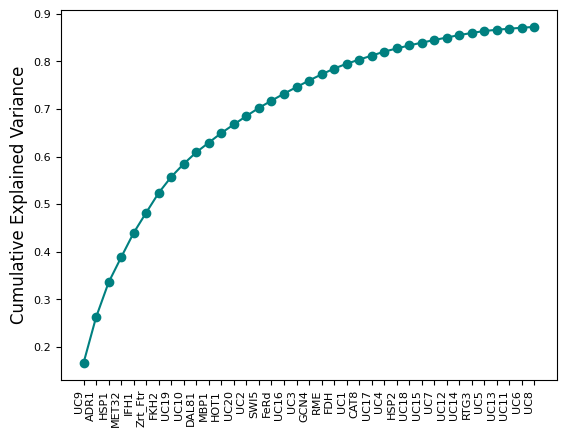

In [40]:
exp_var = ica_data.imodulon_table.sort_values(by='explained_variance', ascending=False).reset_index().copy(deep=False)

plt.plot(exp_var['iModulon Name'],exp_var['explained_variance'].cumsum(), marker='o',color='teal')
plt.xticks(rotation=90, ha='right',fontsize=8);
plt.yticks(fontsize=8)
plt.ylabel('Cumulative Explained Variance',fontsize=12)


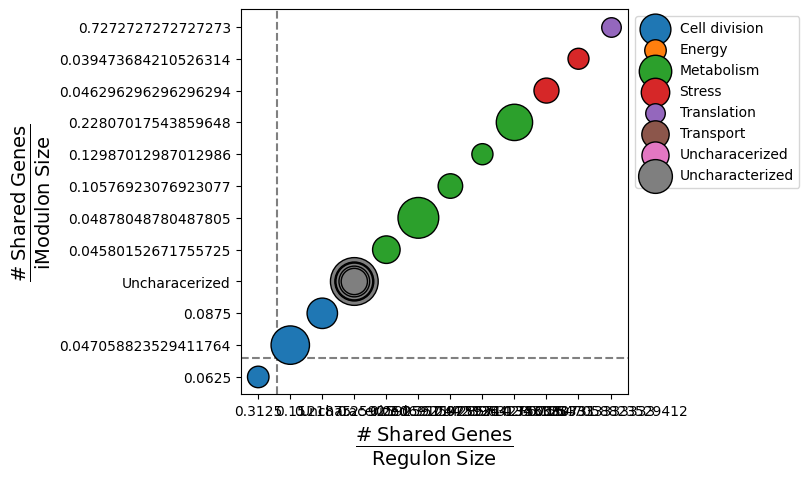

In [41]:
#ica_data.imodulon_table.rename(columns={'ngenes':'n_genes'},inplace=True)

ica_data.imodulon_table['regulator'] = ica_data.imodulon_table['iModulon Name']

compare_imodulons_vs_regulons(ica_data,
                              size_column='ngenes',
                              cat_column='Category',
                              scale=3);


In [34]:
exp_var

,index,iModulon Name,Descriptors,COGs,Category,ngenes,explained_variance,threshold
0,15,UC9,N.A,S (Unknown),Uncharacterized,196,0.166861,0.027916
1,4,ADR1,CRP like - non glucose carbon metabolism,Q (Catabolism),Metabolism,287,0.095930,0.024665
2,14,HSP1,Heat shock protein subunits,S (Unknown),Stress,160,0.073086,0.028105
3,16,MET32,Methionine biosynthesis,E (Amino acid transport),Metabolism,104,0.052601,0.034906
4,24,IFH1,Ribsomal,J (Translation/Ribosomal),Translation,66,0.051413,0.045540
5,19,Zrt_Ftr,"ZRT/FTR (Zinc, iron transporters)",S (Unknown),Transport,220,0.042466,0.026078
6,17,FKH2,chromatin regulation,A (RNA processing and modification),Cell division,255,0.041518,0.030228
7,3,UC19,N.A,N.A,Uncharacterized,0,0.033613,0.120962
8,18,UC10,N.A,Q (Catabolism),Uncharacerized,127,0.027396,0.033213
9,0,DAL81,Ammonia degradation/Nitrogen related,E (Amino acid transport),Metabolism,131,0.024226,0.032645
